In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#1. Load Data dari file iris.data (unduh dulu dari GitHub)
url = 'https://raw.githubusercontent.com/oniisaann/Iris-Perceptron/main/iris.data'
df = pd.read_csv(url, header=None)

#Ambil hanya 2 kelas (Setosa dan Versicolor) dan 2 fitur
df = df[df[4].isin(['Iris-setosa', 'Iris-versicolor'])]
X = df.iloc[:, [0, 2]].values  # Sepal length dan Petal length
y = df.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [ ]:
#2. Definisi Perceptron (Frank Rosenblatt)
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=10):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.errors = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                activation = np.dot(xi, self.weights) + self.bias
                prediction = 1 if activation >= 0 else -1
                update = self.learning_rate * (target - prediction)
                self.weights += update * xi
                self.bias += update
                errors += int(update != 0.0)
            self.errors.append(errors)

    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias >= 0.0, 1, -1)

In [ ]:
#3. Training Perceptron
ppn = Perceptron(learning_rate=0.1, n_iter=10)
ppn.fit(X, y)

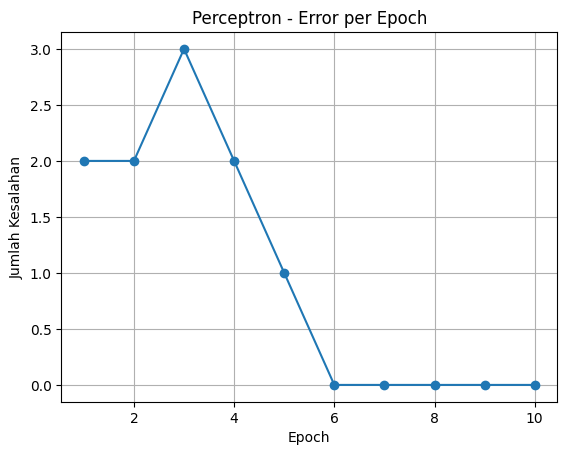

In [ ]:
#4. Plot Error per Epoch
plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Jumlah Kesalahan')
plt.title('Perceptron - Error per Epoch')
plt.grid()
plt.show()

In [ ]:
#5. Fungsi Plot Decision Boundary
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class {cl}')

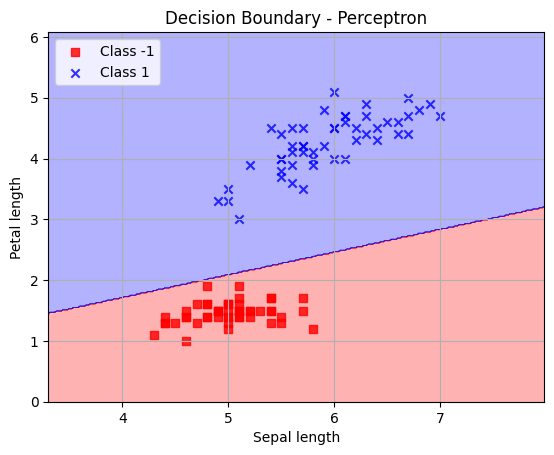

In [ ]:
#6. Plot Decision Region
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Decision Boundary - Perceptron')
plt.legend(loc='upper left')
plt.grid()
plt.show()